In [9]:
#import libraries and read dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
dataframe =pd.read_excel("Employee Sample Data.xlsx")
dataframe.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [10]:
# Get and print the column names
columns = dataframe.columns


# Display the first few rows of the dataframe
dataframe

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E03094,Wesley Young,Sr. Analyst,Marketing,Speciality Products,Male,Caucasian,33,2016-09-18,98427,0.00,United States,Columbus,NaT
996,E01909,Lillian Khan,Analyst,Finance,Speciality Products,Female,Asian,44,2010-05-31,47387,0.00,China,Chengdu,2018-01-08
997,E04398,Oliver Yang,Director,Marketing,Speciality Products,Male,Asian,31,2019-06-10,176710,0.15,United States,Miami,NaT
998,E02521,Lily Nguyen,Sr. Analyst,Finance,Speciality Products,Female,Asian,33,2012-01-28,95960,0.00,China,Chengdu,NaT


print different data informations

In [11]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

 ###Wrangle data
 
You get the data you need in a form you can work with in three steps: gather,
assess, clean

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

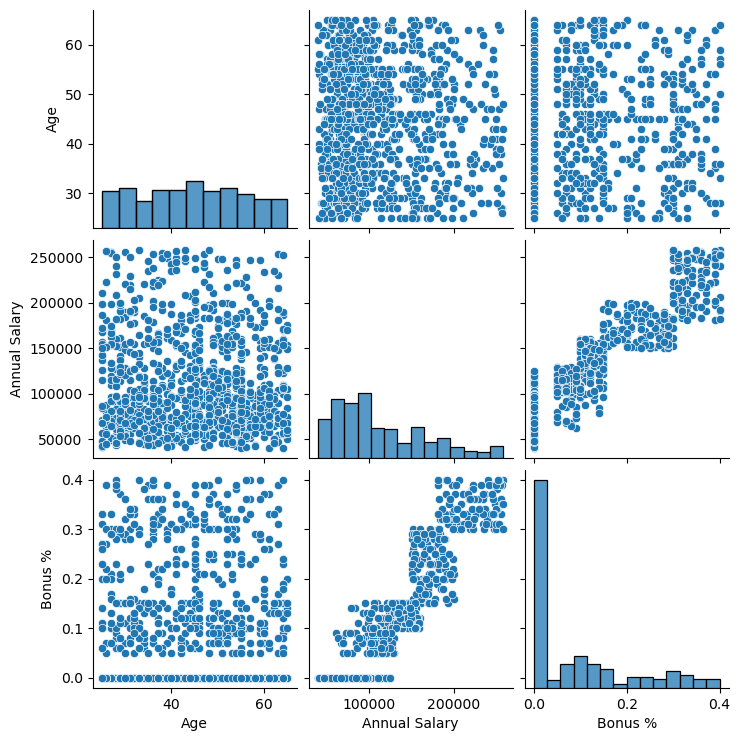

In [12]:
plt.figure(figsize=(15, 8))
sns.pairplot(dataframe)
plt.show()

####Perform EDA (Exploratory Data Analysis)

Exploring involves finding patterns in
your data, visualizing relationships in your data, and building intuition about
what you’re working with. After exploring, you can do things like remove
outliers and create better features from your data, also known as feature
engineering.


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


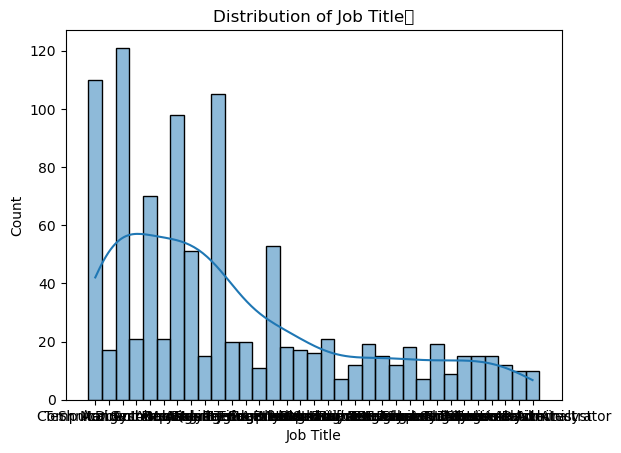

In [14]:
sns.histplot(dataframe['Job Title'], bins=20, kde=True)
plt.title('Distribution of Job Title	')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

Visualize of the dataset  

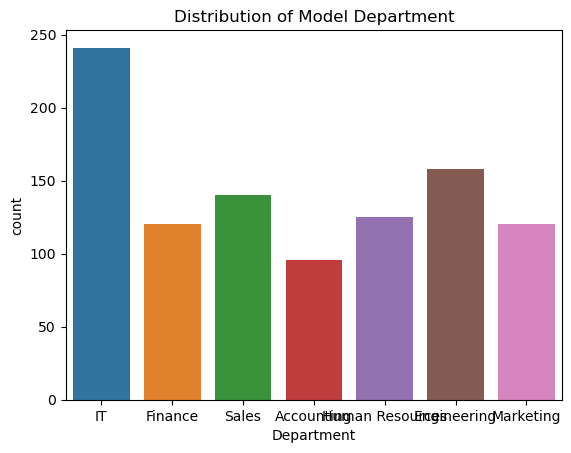

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


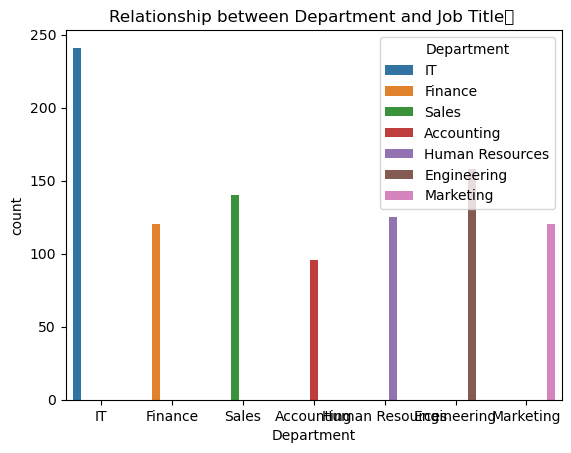

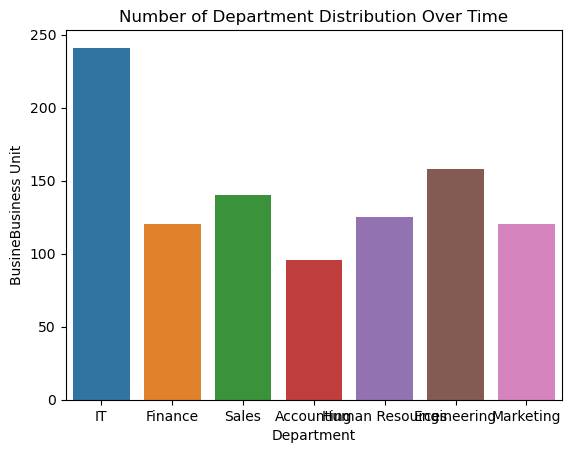

In [19]:
# Visualize the distribution of 'Model Year'
sns.countplot(x='Department', data=dataframe)
plt.title('Distribution of Model Department')
plt.show()

# Visualize the relationship between 'Department' and 'Model Year'
sns.countplot(x='Department', hue='Department', data=dataframe)
plt.title('Relationship between Department and Job Title	 ')
plt.show()

# Visualize the distribution of 'Number of Department  distribution'
sns.countplot(x='Department', data=dataframe)
plt.title('Number of Department Distribution Over Time')
plt.xlabel('Department')
plt.ylabel('BusineBusiness Unit')
plt.show()

drawing conclusions from employee sample data can involve various analyses and interpretations based on the specific information available. Here are some potential conclusions that could be drawn from analyzing employee sample data:

Retention Insights: Analyzing tenure and turnover rates could reveal patterns regarding how long employees tend to stay with the company. Identifying departments or positions with higher turnover rates might suggest areas needing attention in terms of work environment, management, or opportunities for growth.

Performance Trends: Evaluating performance metrics against various factors like training, experience, or tenure could highlight correlations between certain variables and employee performance. This insight could guide future hiring or training strategies.

Diversity and Inclusion: Reviewing demographic data (such as gender, ethnicity, or age) could showcase the diversity within the workforce. Disparities or lack of representation might signal the need for more inclusive practices or targeted hiring efforts.